In [8]:
!pip install cython
!pip install statsmodels

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('tabla_punto_4.csv' , header=None)

df

,0,1,2,3,4,5,6,7
0,CXQ97IWP,Landry,euismod@turpis.org,Thurgood,Majestic Theatre,2008-09-06,1,394.0
1,OLM65HXC,Schultz,dictum.mi.ac@fringillaporttitorvulputate.edu,Dirty Dancing,Nederlander Theatre,2008-08-28,1,89.0
2,ICV06STI,Richmond,scelerisque@interdum.ca,Black Kids,Verizon Center,2008-08-01,1,2264.0
3,IGN99NKK,Juarez,Vivamus.rhoncus@dolornonummyac.com,Killers,Edward Jones Dome,2008-08-12,1,26.0
4,QDM10KBI,Duran,diam.luctus@nisimagna.com,Iggy and the Stooges,Progressive Field,2008-08-03,2,600.0
...,...,...,...,...,...,...,...,...
169674,YJA56TNP,Dodson,lorem.eget.mollis@semegestasblandit.com,Memphis - The Birth of Rock n Roll,John Golden Theatre,2008-09-30,2,328.0
169675,UEQ65XRX,Ball,enim.diam.vel@incursuset.org,KT Tunstall,Yankee Stadium,2008-10-30,2,76.0
169676,NVO47ASC,Franco,Nam.ligula@temporarcuVestibulum.edu,Wallflowers,Safeco Field,2008-10-13,4,1576.0
169677,HZZ05IYP,Spears,lobortis.mauris@ipsum.ca,Jesse Lacey,Jobing.com Arena,2008-09-28,2,4098.0


In [28]:
df.columns = ["ID", "Name", "Email", "Event", "Venue", "SaleTime", "Quantity", "Amount"]
df['SaleTime'] = pd.to_datetime(df['SaleTime'])
df

,ID,Name,Email,Event,Venue,SaleTime,Quantity,Amount
0,CXQ97IWP,Landry,euismod@turpis.org,Thurgood,Majestic Theatre,2008-09-06,1,394.0
1,OLM65HXC,Schultz,dictum.mi.ac@fringillaporttitorvulputate.edu,Dirty Dancing,Nederlander Theatre,2008-08-28,1,89.0
2,ICV06STI,Richmond,scelerisque@interdum.ca,Black Kids,Verizon Center,2008-08-01,1,2264.0
3,IGN99NKK,Juarez,Vivamus.rhoncus@dolornonummyac.com,Killers,Edward Jones Dome,2008-08-12,1,26.0
4,QDM10KBI,Duran,diam.luctus@nisimagna.com,Iggy and the Stooges,Progressive Field,2008-08-03,2,600.0
...,...,...,...,...,...,...,...,...
169674,YJA56TNP,Dodson,lorem.eget.mollis@semegestasblandit.com,Memphis - The Birth of Rock n Roll,John Golden Theatre,2008-09-30,2,328.0
169675,UEQ65XRX,Ball,enim.diam.vel@incursuset.org,KT Tunstall,Yankee Stadium,2008-10-30,2,76.0
169676,NVO47ASC,Franco,Nam.ligula@temporarcuVestibulum.edu,Wallflowers,Safeco Field,2008-10-13,4,1576.0
169677,HZZ05IYP,Spears,lobortis.mauris@ipsum.ca,Jesse Lacey,Jobing.com Arena,2008-09-28,2,4098.0


In [24]:
# Aggregate sales on a daily basis
daily_sales = df.resample('D', on='SaleTime').sum()['Amount'].reset_index()

# Ensure that the index is a DatetimeIndex
daily_sales.set_index('SaleTime', inplace=True)

daily_sales

,Amount
SaleTime,
2008-01-03,832.0
2008-01-04,1396.0
2008-01-05,10581.0
2008-01-06,938.0
2008-01-07,4134.0
...,...
2008-12-27,471858.0
2008-12-28,451768.0
2008-12-29,328507.0


In [25]:
# Fit ARIMA model
model = ARIMA(daily_sales, order=(5, 1, 0))
results = model.fit()

results


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
# Forecast for the next 7 days
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean.values}, index=forecast_index)

forecast_df

,Forecast
2009-01-01,392834.408183
2009-01-02,376549.703617
2009-01-03,347126.667333
2009-01-04,336728.186105
2009-01-05,353155.656681
2009-01-06,366763.079112
2009-01-07,361190.643470


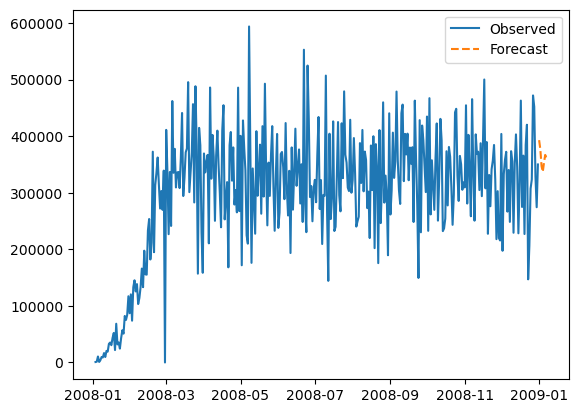

                 Forecast
2009-01-01  392834.408183
2009-01-02  376549.703617
2009-01-03  347126.667333
2009-01-04  336728.186105
2009-01-05  353155.656681
2009-01-06  366763.079112
2009-01-07  361190.643470


In [29]:
# Plot the results
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_df, label='Forecast', linestyle='dashed')
plt.legend()
plt.show()

# Display the forecast for the next 7 days
print(forecast_df)